<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Check-in" data-toc-modified-id="Final-Project-Check-in-1">Final Project Check-in</a></span></li><li><span><a href="#Group-Name" data-toc-modified-id="Group-Name-2">Group Name</a></span></li><li><span><a href="#Student-Names" data-toc-modified-id="Student-Names-3">Student Names</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-4">Load Data</a></span></li><li><span><a href="#Fit-scikit-learn-model" data-toc-modified-id="Fit-scikit-learn-model-5">Fit scikit-learn model</a></span></li><li><span><a href="#Evaluation-Metric" data-toc-modified-id="Evaluation-Metric-6">Evaluation Metric</a></span></li></ul></div>

Final Project Check-in
------

Group Name
-----

Litter Box

Student Names
----

1. Ruizhe (Jack) Dong
2. Xu Liu
3. Esme Luo

Load Data
-----

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn import impute
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import compose

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Load Data
--------

In [4]:
train = pd.read_csv("Data/train.csv")

y_train = train.SalePrice
X_train = train.drop(['SalePrice'], axis=1)

In [8]:
test = pd.read_csv("Data/test.csv")

#y_test = test.SalePrice
X_test = test

Understanding Data
------

In [10]:
X_train.get_dtype_counts()

int64      34
object     43
float64     3
dtype: int64

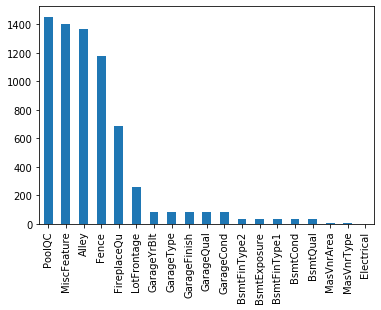

In [25]:
Num_Nulls = X_train.isnull().sum()
Num_Nulls = Num_Nulls[Num_Nulls > 0]
Num_Nulls.sort_values(ascending=False,inplace=True)
Num_Nulls.plot.bar()

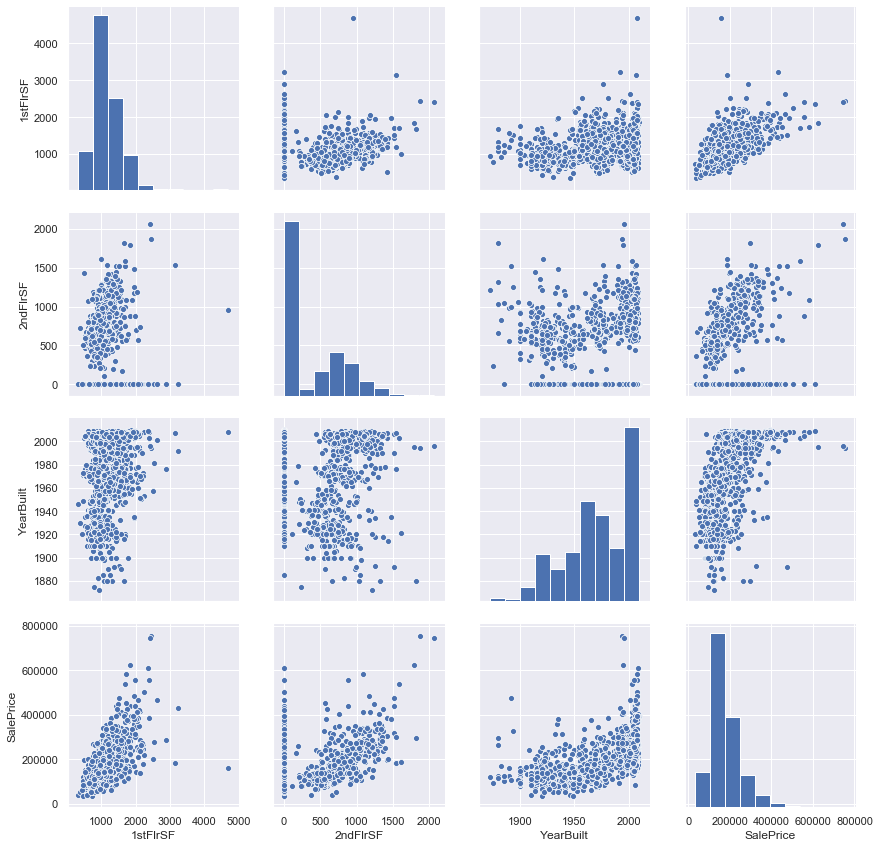

In [31]:
#scatterplot
sns.set()
cols = ['1stFlrSF','2ndFlrSF','YearBuilt', 'SalePrice']
sns.pairplot(train[cols], size = 3)
plt.show();

Summary Statistics
-----------

In [40]:
train["Neighborhood"].unique

<bound method Series.unique of 0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object>

Feature Engineering 
---------

Fit scikit-learn model
----

In [ ]:
def make_pipeline(regressor=None):
    "Create a single pipeline that processing the data and then fits the regressor." 
        
    numeric_features = ['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1','BsmtFullBath','BsmtHalfBath','BsmtUnfSF',
                       'EnclosedPorch','Fireplaces','FullBath','GarageArea','GarageCars','GarageYrBlt','GrLivArea','HalfBath',
                       'KitchenAbvGr','LotArea','LotFrontage','LowQualFinSF','MasVnrArea','MiscVal','MoSold','MSSubClass','OpenPorchSF',
                       'OverallCond','OverallQual','PoolArea','ScreenPorch','YrSold', 'YearRemodAdd', 'YearBuilt', 'WoodDeckSF', 
                        'TotRmsAbvGrd', 'TotalBsmtSF']
    numeric_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='median'))])
    
    categorical_features = ['BldgType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtQual','CentralAir','Condition1','Condition2',
                           'Electrical','ExterCond','Exterior1st','Exterior2nd','ExterQual','Foundation','Functional','GarageType',
                           'Heating','HeatingQC','HouseStyle','KitchenQual','LandContour','LandSlope','LotConfig','LotShape',
                           'MasVnrType','MiscFeature','MSZoning','Neighborhood','PavedDrive','RoofMatl','RoofStyle','SaleCondition',
                           'SaleType','Street','Utilities']
    categorical_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='constant', fill_value='most_frequent')),
                                              ('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))])
    
    
    preprocessor = compose.ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                                           ('cat', categorical_transformer, categorical_features)])
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestRegressor())])

    
    
    return pipeline

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=30,
                                  min_samples_leaf=1,
                                  random_state=42)

In [ ]:
pipeline = make_pipeline(regressor)

In [ ]:
pipeline.fit(X_train, y_train)

Evaluation Metric
----

In [ ]:
from sklearn.metrics import median_absolute_error

In [ ]:
y_pred = pipeline.predict(X_train)
medae_value_train = median_absolute_error(y_train, y_pred)
print(f"{medae_value_train:.4f} medae on train dataset")  